In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

main_experiments_path = "../experiments"


basic_method_names = [
    "svr",
    "pls",
    "gradboost",
    "mlp_0.01",
    "mlp_0.001",
    "mlp_0.0001",
    "rbf_full_0.01",
    "rbf_full_0.001",
    "rbf_full_0.0001",
    "rbf_diag_0.01",
    "rbf_diag_0.001",
    "rbf_diag_0.0001",
    "rbf_scal_0.01",
    "rbf_scal_0.001",
    "rbf_scal_0.0001",
    "rbf_univ_0.01",
    "rbf_univ_0.001",
    "rbf_univ_0.0001",
    "ffn_0.1_0.01",
    "ffn_0.1_0.001",
    "ffn_0.1_0.0001",
    "ffn_1_0.01",
    "ffn_1_0.001",
    "ffn_1_0.0001",
    "ffn_10_0.01",
    "ffn_10_0.001",
    "ffn_10_0.0001",
    "uffn_0.1_0.01",
    "uffn_0.1_0.001",
    "uffn_0.1_0.0001",
    "uffn_1_0.01",
    "uffn_1_0.001",
    "uffn_1_0.0001",
    "uffn_10_0.01",
    "uffn_10_0.001",
    "uffn_10_0.0001",
]


basic_condensed_method_names = [
    "svr",
    "pls",
    "gradboost",
    "mlp",
    "rbf_full",
    "rbf_diag",
    "rbf_scal",
    "rbf_univ",
    "ffn",
    "uffn",
]

method_names = basic_method_names
condensed_method_names = basic_condensed_method_names

experiments_df = pd.DataFrame()


method_settings = os.listdir(main_experiments_path)

# sort by name

method_settings = sorted(method_settings)

#print all folders in the main experiments path
for method_setting in method_settings:
    #print(method_setting)
    # iterate over repetitions

    experiment_df = pd.DataFrame()

    if method_setting.startswith("."):
        continue

    for repetition in os.listdir(main_experiments_path + "/" + method_setting):
        #print(repetition)
        # iterate over files

        if repetition.startswith("."):
            continue

        ## add this repetition to the experiment df as column
        experiment_df[repetition] = None

        try:
            ## read the npy file
            train_loss = np.load(main_experiments_path + "/" + method_setting + "/" + repetition + "/data/" + "train_loss.npy")
            val_loss = np.load(main_experiments_path + "/" + method_setting + "/" + repetition +  "/data/"  + "val_loss.npy")
            test_loss = np.load(main_experiments_path + "/" + method_setting + "/" + repetition + "/data/" + "test_loss.npy")
        except Exception as e:
            print("Error reading files for dataset: ", method_setting, e)
            continue
        
        ### extract the min val loss and pick the corresponding test loss

        min_val_loss = np.min(val_loss)
        min_val_loss_index = np.argmin(val_loss)

        min_test_loss = test_loss[min_val_loss_index]

    
        ## add the test loss to the experiment df
        experiment_df.loc["data",repetition] = min_test_loss

    print(experiment_df)

    ## order by dataset name
    experiment_df = experiment_df.sort_index()

    ## add a column which represents the mean of all repetitions
    experiment_df["mean"] = experiment_df.mean(axis=1)

    ## set mean to nan if there are any nans in the row
    experiment_df.loc[experiment_df.isnull().any(axis=1), "mean"] = np.nan

    ## add the experiment df to the experiments df
    experiments_df[method_setting] = experiment_df["mean"]


for i, method_name in enumerate(method_names):
    ## rename column experiment_000001 to method_names[0]
    exp_name = "experiment_" + str(i+1).zfill(6)
    experiments_df = experiments_df.rename(columns={exp_name: method_name})

experiments_df



     repetition_000003 repetition_000004 repetition_000005 repetition_000002  \
data       1074.418861       1072.545907       1371.594445       1327.221047   

     repetition_000007 repetition_000000 repetition_000001 repetition_000006  
data       1078.534112       1303.534984        2252.32982       1041.674221  
     repetition_000003 repetition_000004 repetition_000005 repetition_000002  \
data       1068.481151       1097.729563        1390.95716       1490.601948   

     repetition_000007 repetition_000000 repetition_000001 repetition_000006  
data       1133.851144       1367.672497       2209.868396       1042.171045  
     repetition_000003 repetition_000004 repetition_000005 repetition_000002  \
data         515.43123        417.044783         409.73051        416.089905   

     repetition_000007 repetition_000000 repetition_000001 repetition_000006  
data         597.63414        604.692124        999.921938        494.121334  
     repetition_000003 repetition_000004 re

,svr,pls,gradboost,mlp_0.01,mlp_0.001,mlp_0.0001,rbf_full_0.01,rbf_full_0.001,rbf_full_0.0001,rbf_diag_0.01,...,ffn_10_0.0001,uffn_0.1_0.01,uffn_0.1_0.001,uffn_0.1_0.0001,uffn_1_0.01,uffn_1_0.001,uffn_1_0.0001,uffn_10_0.01,uffn_10_0.001,uffn_10_0.0001
data,1315.231675,1350.166613,556.833245,353.342649,768.431892,1319.946976,141.185256,204.784835,1125.042183,141.185256,...,1434.034653,901.220612,1213.642143,1365.540756,112.703402,127.568244,1018.493332,1063.49353,1035.929146,1192.08548


In [2]:
condensed_experiments_df = pd.DataFrame()
## iterate over the condensed method names and pick the min test loss for the corresponding methods 
for condensed_method in condensed_method_names:
    condensed_experiments_df[condensed_method] = experiments_df[[method for method in method_names if method.startswith(condensed_method)]].min(axis=1)

## set all None to nan
condensed_experiments_df = condensed_experiments_df.replace({None: np.nan})

condensed_experiments_df

,svr,pls,gradboost,mlp,rbf_full,rbf_diag,rbf_scal,rbf_univ,ffn,uffn
data,1315.231675,1350.166613,556.833245,353.342649,141.185256,141.185256,118.389984,36.099507,68.532252,112.703402


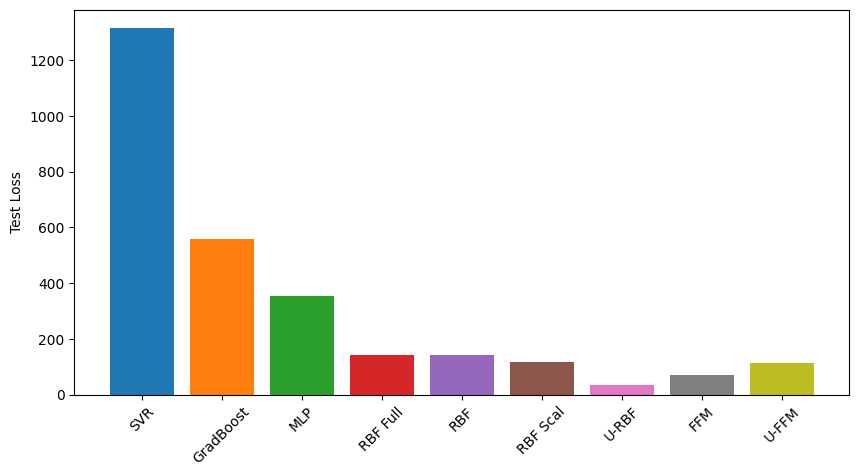

In [4]:

renamed_experiments_df = condensed_experiments_df.copy()

method_renaming = {
    "svr": "SVR",
    #"pls": "PLS",
    "gradboost": "GradBoost",
    "mlp": "MLP",
    "rbf_full": "RBF Full",
    "rbf_diag": "RBF",
    "rbf_scal": "RBF Scal",
    "rbf_univ": "U-RBF",
    "ffn": "FFM",
    "uffn": "U-FFM",
}

## rename the methods and exclude methods whose names are not in the method_renaming dict

renamed_experiments_df = renamed_experiments_df[[method for method in condensed_method_names if method in method_renaming.keys()]]
renamed_experiments_df = renamed_experiments_df.rename(columns=method_renaming)


renamed_experiments_df


## plot the results as a bar chart

plt.figure(figsize=(10, 5))

colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]

plt.bar(renamed_experiments_df.columns, renamed_experiments_df.mean(), yerr=renamed_experiments_df.std(), capsize=5,color=colors)

plt.ylabel("Test Loss")
plt.xticks(rotation=45)

plt.show()




                     data scale learning_rate
ffn_0.1_0.01   638.069874   0.1          0.01
ffn_1_0.01       69.19435     1          0.01
ffn_10_0.01   1414.278259    10          0.01
                      data scale learning_rate
ffn_0.1_0.001  1089.711716   0.1         0.001
ffn_1_0.001      68.532252     1         0.001
ffn_10_0.001   1445.404449    10         0.001
                       data scale learning_rate
ffn_0.1_0.0001  1345.950333   0.1        0.0001
ffn_1_0.0001     719.292854     1        0.0001
ffn_10_0.0001   1434.034653    10        0.0001


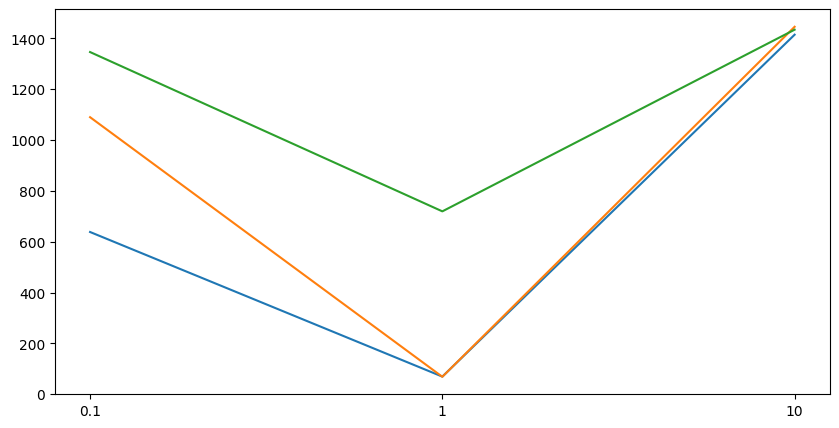

,data,scale,learning_rate
ffn_0.1_0.01,638.069874,0.1,0.01
ffn_0.1_0.001,1089.711716,0.1,0.001
ffn_0.1_0.0001,1345.950333,0.1,0.0001
ffn_1_0.01,69.19435,1,0.01
ffn_1_0.001,68.532252,1,0.001
ffn_1_0.0001,719.292854,1,0.0001
ffn_10_0.01,1414.278259,10,0.01
ffn_10_0.001,1445.404449,10,0.001
ffn_10_0.0001,1434.034653,10,0.0001


In [26]:
# keep only the methods that contain ffn as a string

ffn_experiments_df = experiments_df[[method for method in method_names if "ffn" in method]]

### the method names are structured as follows: ffn_{scale}_{learning_rate} or uffn_{scale}_{learning_rate} and each method is its own column
### split the df in two: one for ffn and one for uffn


uffn_experiments_df = ffn_experiments_df[[method for method in ffn_experiments_df.columns if "uffn" in method]]
ffn_experiments_df = ffn_experiments_df[[method for method in ffn_experiments_df.columns if method.startswith("ffn")]]


## for both dataframes put the learning rate and scale in additional rows 

ffn_experiments_df = ffn_experiments_df.T

ffn_experiments_df["scale"] = ffn_experiments_df.index.str.split("_").str[1]
ffn_experiments_df["learning_rate"] = ffn_experiments_df.index.str.split("_").str[2]

## plot the loss on the y axis and the scale on the x axis and color each line by learning rate 

plt.figure(figsize=(10, 5))


for learning_rate in ffn_experiments_df["learning_rate"].unique():
    df = ffn_experiments_df[(ffn_experiments_df["learning_rate"] == learning_rate)]

    print(df)

    plt.plot(df["scale"], df["data"], label=learning_rate)


plt.show()


ffn_experiments_df